# L1 and L2 regularization 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(800, noise=0.3)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [5]:
def plot_data_and_model_decision(
    X, y,
    model=None,
    x1limits=(-2.0, 3.0),
    x2limits=(-1.5, 2.0),
    npoints=250,
    make_figure=True
):
    if make_figure:
        plt.figure(figsize=(6, 6), dpi=100)

    plt.scatter(*X.T, c=y, cmap='PiYG')
    
    plt.xlim(*x1limits)
    plt.ylim(*x2limits)
    
    if model is not None:
        xx1, xx2 = np.meshgrid(
            np.linspace(*x1limits, npoints),
            np.linspace(*x2limits, npoints)
        )
        yy = model.predict(
            np.stack([xx1.ravel(), xx2.ravel()], axis=1)
        ).reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, yy, levels=30, cmap='PiYG', alpha=0.5)

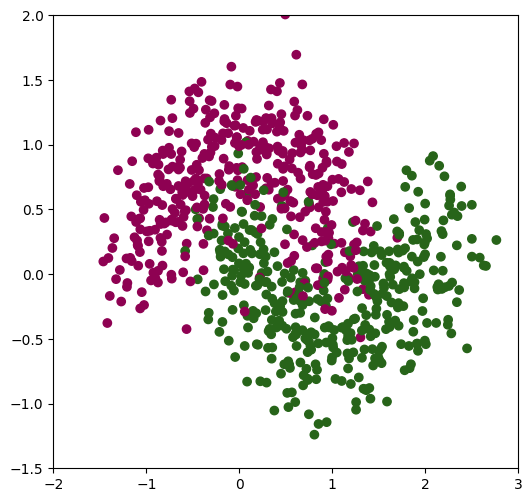

In [6]:
plot_data_and_model_decision(X, y)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [8]:
from tqdm import tqdm

  0%|          | 0/16 [00:00<?, ?it/s]

  6%|▋         | 1/16 [00:10<02:33, 10.20s/it]

 12%|█▎        | 2/16 [00:17<02:11,  9.42s/it]

 19%|█▉        | 3/16 [00:24<01:53,  8.69s/it]

 25%|██▌       | 4/16 [00:30<01:33,  7.83s/it]

 31%|███▏      | 5/16 [00:35<01:15,  6.83s/it]

 38%|███▊      | 6/16 [00:37<00:55,  5.59s/it]

 44%|████▍     | 7/16 [00:40<00:42,  4.69s/it]

 50%|█████     | 8/16 [00:41<00:28,  3.61s/it]

 56%|█████▋    | 9/16 [00:42<00:19,  2.77s/it]

 62%|██████▎   | 10/16 [00:43<00:13,  2.18s/it]

 69%|██████▉   | 11/16 [00:43<00:08,  1.70s/it]

 75%|███████▌  | 12/16 [00:44<00:05,  1.37s/it]

 81%|████████▏ | 13/16 [00:44<00:03,  1.11s/it]

 88%|████████▊ | 14/16 [00:45<00:01,  1.08it/s]

 94%|█████████▍| 15/16 [00:45<00:00,  1.25it/s]

100%|██████████| 16/16 [00:46<00:00,  1.48it/s]

100%|██████████| 16/16 [00:46<00:00,  2.89s/it]

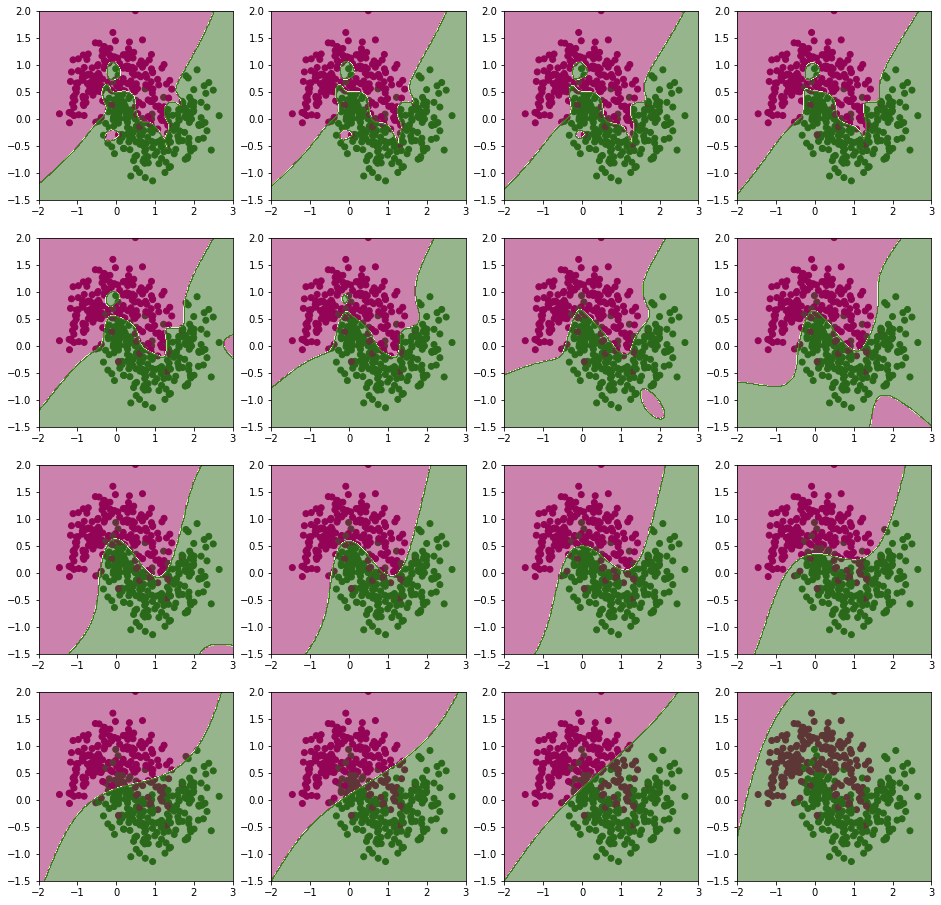

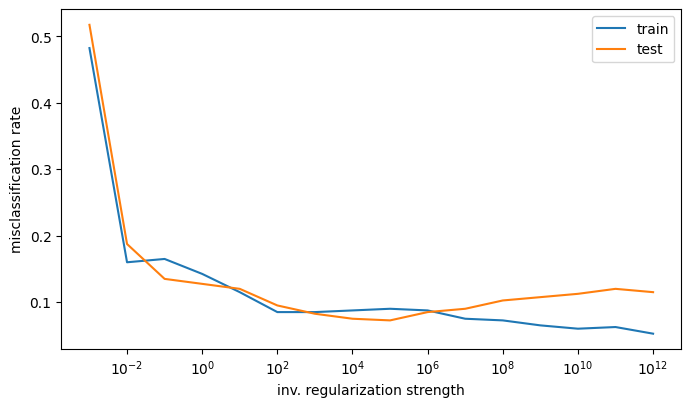

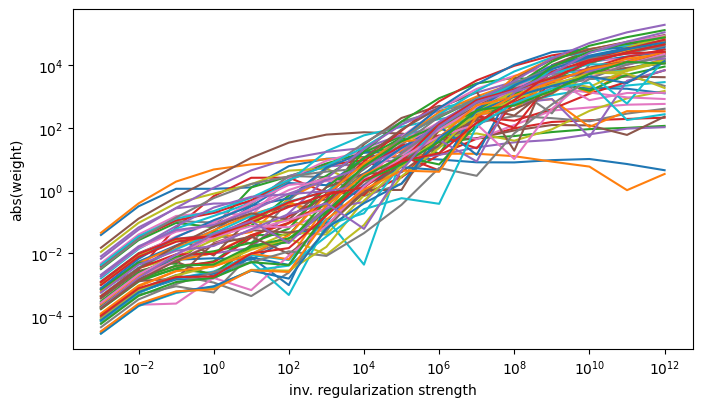

In [9]:
sqrt_num_plots = 4

inverse_regularization_powers = np.logspace(12, -3, sqrt_num_plots**2)

plt.figure(figsize=(16, 16))

models = []
train_scores = []
test_scores = []

for i, C in enumerate(tqdm(inverse_regularization_powers)):
    model = make_pipeline(
        MinMaxScaler((-0.9, 0.9)),
        PolynomialFeatures(10, include_bias=False),
        LogisticRegression(penalty='l2', C=C, solver='newton-cg', max_iter=100000)
    )

    model.fit(X_train, y_train);
    models.append(model)
    train_scores.append((model.predict(X_train) == y_train).mean())
    test_scores.append((model.predict(X_test) == y_test).mean())
    
    plt.subplot(sqrt_num_plots, sqrt_num_plots, i + 1)
    plot_data_and_model_decision(X_train, y_train, model, make_figure=False)


train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

plt.figure(figsize=(8, 4.5), dpi=100)
plt.plot(inverse_regularization_powers, 1. - train_scores, label='train')
plt.plot(inverse_regularization_powers, 1. - test_scores, label='test')
plt.legend();
plt.xlabel('inv. regularization strength')
plt.ylabel('misclassification rate')
plt.xscale('log');


weights = np.array([model.steps[-1][1].coef_ for model in models]).squeeze()
plt.figure(figsize=(8, 4.5), dpi=100)
for w in weights.T:
    plt.plot(inverse_regularization_powers, np.abs(w));
plt.xscale('log')
plt.yscale('log')
plt.xlabel('inv. regularization strength')
plt.ylabel('abs(weight)');

  0%|          | 0/64 [00:00<?, ?it/s]

  2%|▏         | 1/64 [00:01<01:38,  1.56s/it]

  3%|▎         | 2/64 [00:03<01:37,  1.57s/it]

  5%|▍         | 3/64 [00:04<01:36,  1.58s/it]

  6%|▋         | 4/64 [00:06<01:33,  1.56s/it]

  8%|▊         | 5/64 [00:07<01:32,  1.57s/it]

  9%|▉         | 6/64 [00:09<01:29,  1.55s/it]

 11%|█         | 7/64 [00:10<01:27,  1.53s/it]

 12%|█▎        | 8/64 [00:12<01:25,  1.52s/it]

 14%|█▍        | 9/64 [00:13<01:23,  1.52s/it]

 16%|█▌        | 10/64 [00:15<01:23,  1.55s/it]

 17%|█▋        | 11/64 [00:16<01:20,  1.53s/it]

 19%|█▉        | 12/64 [00:18<01:17,  1.49s/it]

 20%|██        | 13/64 [00:19<01:14,  1.46s/it]

 22%|██▏       | 14/64 [00:21<01:12,  1.44s/it]

 23%|██▎       | 15/64 [00:22<01:08,  1.40s/it]

 25%|██▌       | 16/64 [00:23<01:05,  1.37s/it]

 27%|██▋       | 17/64 [00:24<01:01,  1.32s/it]

 28%|██▊       | 18/64 [00:26<00:57,  1.25s/it]

 30%|██▉       | 19/64 [00:27<00:52,  1.18s/it]

 31%|███▏      | 20/64 [00:27<00:46,  1.06s/it]

 33%|███▎      | 21/64 [00:28<00:42,  1.02it/s]

 34%|███▍      | 22/64 [00:29<00:39,  1.07it/s]

 36%|███▌      | 23/64 [00:30<00:36,  1.12it/s]

 38%|███▊      | 24/64 [00:31<00:34,  1.16it/s]

 39%|███▉      | 25/64 [00:31<00:32,  1.18it/s]

 41%|████      | 26/64 [00:32<00:31,  1.20it/s]

 42%|████▏     | 27/64 [00:33<00:30,  1.22it/s]

 44%|████▍     | 28/64 [00:34<00:34,  1.04it/s]

 45%|████▌     | 29/64 [00:35<00:35,  1.01s/it]

 47%|████▋     | 30/64 [00:36<00:33,  1.03it/s]

 48%|████▊     | 31/64 [00:37<00:30,  1.09it/s]

 50%|█████     | 32/64 [00:38<00:28,  1.13it/s]

 52%|█████▏    | 33/64 [00:39<00:25,  1.21it/s]

 53%|█████▎    | 34/64 [00:39<00:23,  1.26it/s]

 55%|█████▍    | 35/64 [00:40<00:22,  1.31it/s]

 56%|█████▋    | 36/64 [00:41<00:20,  1.40it/s]

 58%|█████▊    | 37/64 [00:41<00:19,  1.41it/s]

 59%|█████▉    | 38/64 [00:42<00:17,  1.48it/s]

 61%|██████    | 39/64 [00:42<00:15,  1.60it/s]

 62%|██████▎   | 40/64 [00:43<00:14,  1.70it/s]

 64%|██████▍   | 41/64 [00:43<00:12,  1.79it/s]

 66%|██████▌   | 42/64 [00:44<00:11,  1.84it/s]

 67%|██████▋   | 43/64 [00:44<00:10,  2.00it/s]

 69%|██████▉   | 44/64 [00:45<00:09,  2.13it/s]

 70%|███████   | 45/64 [00:45<00:08,  2.22it/s]

 72%|███████▏  | 46/64 [00:45<00:07,  2.30it/s]

 73%|███████▎  | 47/64 [00:46<00:07,  2.37it/s]

 75%|███████▌  | 48/64 [00:46<00:06,  2.40it/s]

 77%|███████▋  | 49/64 [00:47<00:06,  2.43it/s]

 78%|███████▊  | 50/64 [00:47<00:05,  2.46it/s]

 80%|███████▉  | 51/64 [00:47<00:05,  2.47it/s]

 81%|████████▏ | 52/64 [00:48<00:04,  2.47it/s]

 83%|████████▎ | 53/64 [00:48<00:04,  2.47it/s]

 84%|████████▍ | 54/64 [00:49<00:04,  2.48it/s]

 86%|████████▌ | 55/64 [00:49<00:03,  2.49it/s]

 88%|████████▊ | 56/64 [00:49<00:03,  2.51it/s]

 89%|████████▉ | 57/64 [00:50<00:02,  2.49it/s]

 91%|█████████ | 58/64 [00:50<00:02,  2.50it/s]

 92%|█████████▏| 59/64 [00:51<00:02,  2.50it/s]

 94%|█████████▍| 60/64 [00:51<00:01,  2.50it/s]

 95%|█████████▌| 61/64 [00:51<00:01,  2.87it/s]

 97%|█████████▋| 62/64 [00:52<00:00,  2.84it/s]

 98%|█████████▊| 63/64 [00:52<00:00,  2.97it/s]

100%|██████████| 64/64 [00:52<00:00,  2.98it/s]

100%|██████████| 64/64 [00:52<00:00,  1.21it/s]

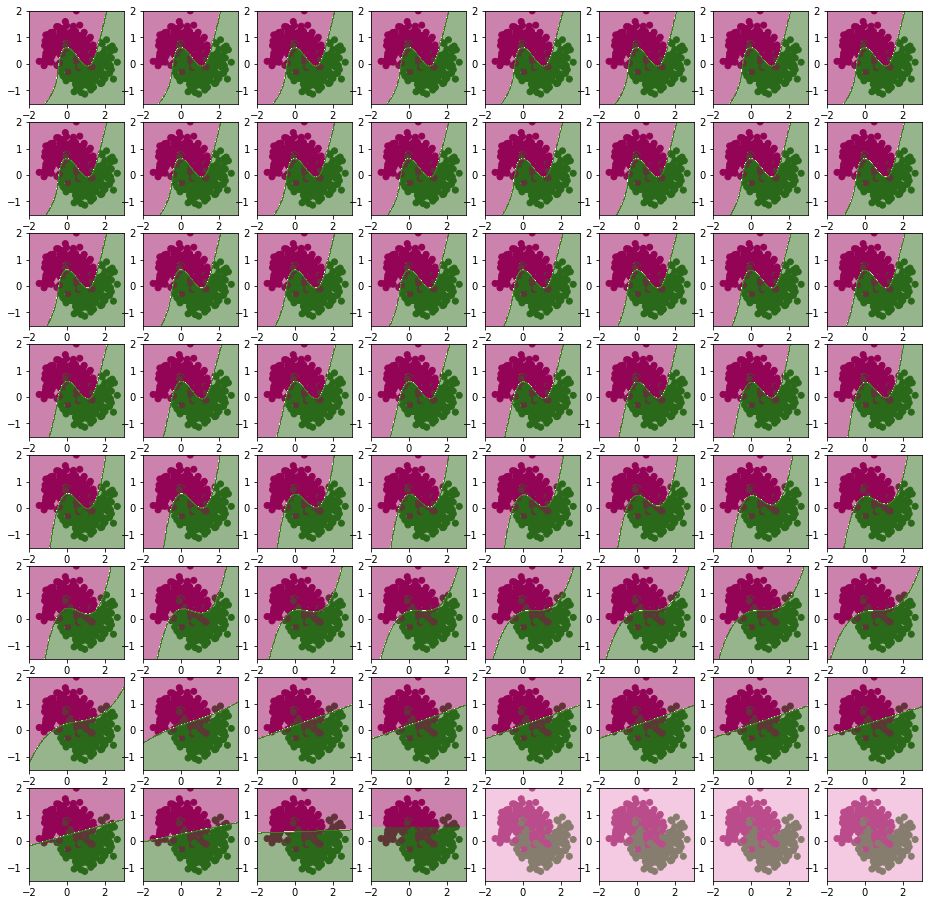

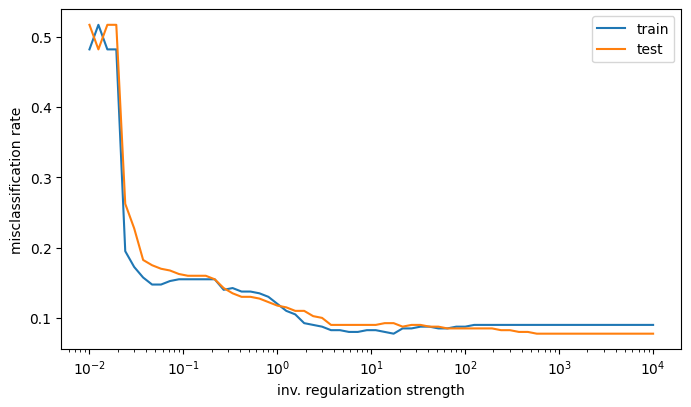

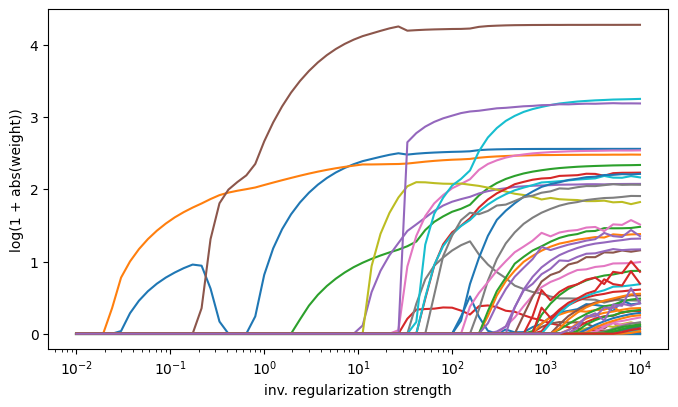

In [10]:
sqrt_num_plots = 8

inverse_regularization_powers = np.logspace(4, -2, sqrt_num_plots**2)

plt.figure(figsize=(16, 16))

models = []
train_scores = []
test_scores = []

for i, C in enumerate(tqdm(inverse_regularization_powers)):
    model = make_pipeline(
        MinMaxScaler((-0.9, 0.9)),
        PolynomialFeatures(10, include_bias=False),
        LogisticRegression(penalty='l1', C=C, solver='saga', max_iter=10000)
    )

    model.fit(X_train, y_train);
    models.append(model)
    train_scores.append((model.predict(X_train) == y_train).mean())
    test_scores.append((model.predict(X_test) == y_test).mean())
    
    plt.subplot(sqrt_num_plots, sqrt_num_plots, i + 1)
    plot_data_and_model_decision(X_train, y_train, model, make_figure=False)


train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

plt.figure(figsize=(8, 4.5), dpi=100)
plt.plot(inverse_regularization_powers, 1. - train_scores, label='train')
plt.plot(inverse_regularization_powers, 1. - test_scores, label='test')
plt.legend();
plt.xlabel('inv. regularization strength')
plt.ylabel('misclassification rate')
plt.xscale('log');


weights = np.array([model.steps[-1][1].coef_ for model in models]).squeeze()
plt.figure(figsize=(8, 4.5), dpi=100)
for w in weights.T:
    plt.plot(inverse_regularization_powers, np.log1p(np.abs(w)));
plt.xscale('log')
plt.xlabel('inv. regularization strength')
plt.ylabel('log(1 + abs(weight))');

---------

## Final quest

Build a model for the regression problem below to beat the score of test MSE < 0.0005.
You may try using `sklearn.linear_model.Ridge` or `sklearn.linear_model.Lasso` linear models.

In [26]:
from scipy.special import sph_harm as unknown_magic_function
from sklearn.linear_model import Ridge, Lasso

def gen_data(N=2000):
    X1 = np.random.uniform(-1, 1, size=(N, 2))
    X2 = np.random.randint(0, 3, size=(N, 1))
    X3 = np.round(np.random.uniform(-1, 1, size=(N, 1)) * X2).astype(int)
    
    y = unknown_magic_function(X3[:,0], X2[:,0], *np.arccos(X1.T)).imag
    
    X = np.concatenate([X1, X2, X3], axis=1)
    
    return X, y

X_train, y_train = gen_data()
X_test, y_test = gen_data()

model = make_pipeline(
    MinMaxScaler((-0.9, 0.9)),
    PolynomialFeatures(20, include_bias=False),
    Ridge(alpha=1e-5)
)

model.fit(X_train, y_train)

print(((model.predict(X_train) - y_train)**2).mean())
print(((model.predict(X_test) - y_test)**2).mean())

3.237171494647365e-07


6.553831687927484e-05


In [27]:
from scipy.special import sph_harm as unknown_magic_function
from sklearn.linear_model import Ridge, Lasso

def gen_data(N=2000):
    X1 = np.random.uniform(-1, 1, size=(N, 2))
    X2 = np.random.randint(0, 3, size=(N, 1))
    X3 = np.round(np.random.uniform(-1, 1, size=(N, 1)) * X2).astype(int)
    
    y = unknown_magic_function(X3[:,0], X2[:,0], *np.arccos(X1.T)).imag
    
    X = np.concatenate([X1, X2, X3], axis=1)
    
    return X, y

X_train, y_train = gen_data()
X_test, y_test = gen_data()

model.fit(X_train, y_train)

test_mse = ((model.predict(X_test) - y_test)**2).mean()

assert test_mse < 0.0005, test_mse